
# Carros - Dataset de Decisión de compra 
Jeffrey Leiva Cascante ...

Richard León Chinchilla 2019003759

## Descripción del dataset

Este conjunto de datos tiene como objetivo predecir la decisión de compra de un carro, indicando si un cliente va a comprar o no un carro basado en diferentes carácteristicas demográficas y socioeconómicos. Este dataset puede encontrarse en: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset

## ¿Qué hace que una persona compre un carro?

Según Espinoza (2023), hay diversos factores y razones por las cual un cliente decide comprar un carro. Una de ellas, es el presupuesto, el cliente evalúa sus ingresos, la financiación del vehiculo, o si es una inversión a corto o largo plazo. Otra importante es la necesidad, siguiendo la "Pirámide de Maslow" existen cinco niveles de necesidades en todo individuo: Fisilógicos, de seguirdad, sociales, del ego, y de autorrealización, en este caso se podría asociar con el rango de edad y qué genero suele necesitar más un carro.

## Información presente en el Dataset
El conjunto de datos contiene detalles de 1000 clientes quienes intentan comprar un carro, considerando sus salarios anuales.

Las columnas del dataset son las siguientes:

- User ID (Identificación): Número
- Gender (Género): Masculino o Femenino
- Age (Edad): Número
- Anual Salary (Salario anual): Número

## Análisis del Dataset

Lectura del conjunto de datos.

In [144]:
import pandas as pd
data_set_cars= pd.read_csv("./Datasets/car_data.csv")

Revisión de valores nulos

In [145]:
data_set_cars.isna().sum().sum()

0

Contamos cuantas muestras por cada feature tienen como valor 0.

In [146]:
zero_counts = (data_set_cars == 0).sum()

print(zero_counts)

User ID           0
Gender            0
Age               0
AnnualSalary      0
Purchased       598
dtype: int64


Para User ID hay 0 muestras que contienen 0, tiene sentido ya que se refiere al la identificación de los clientes.

Para Gender, es correcto que no haya muestras en 0, ya que solo debe ser Male o Female.

Para Age, es correcto que no hayan muestras con edad 0.

Para AnnualSalary, tiene sentido que no hayan muestras en 0.

Para Purchased, como toma como resultado 0 o 1, es lógico que tengan muchas muestras en 0.

Ahora verificamos si el dataset se encuentra balanceado o no.

In [147]:
data_set_cars.value_counts('Purchased')

Purchased
0    598
1    402
Name: count, dtype: int64

La cantidad de clientes que sí realizaron la compra son de 598 (59.8%) y 402 (40.2%) para los que no hicieron la compra. 

Por lo tanto, se puede decir que este dataset se encuentra **desbalanceado**

### Tratamiento del feature Gender

Debido a que el género está denotado como "Male" o "Female", se tratará como 0 para "Male" (Masculino) y 1 para "Female" (Femenino).

In [148]:
data_set_cars['Gender'] = data_set_cars['Gender'].map({'Male':0,'Female':1})

Ahora obtenemos un panorama de la inforamción general del conjunto de datos.

El feature User ID es irrelevante para efectos del modelo porque no aporta a la predicción, por lo tanto, se elimina.

In [149]:
data_set_cars = data_set_cars.drop(columns=['User ID'])

print(data_set_cars.describe())
print("\n")
print(data_set_cars.head())

            Gender          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean      0.516000    40.106000   72689.000000     0.402000
std       0.499994    10.707073   34488.341867     0.490547
min       0.000000    18.000000   15000.000000     0.000000
25%       0.000000    32.000000   46375.000000     0.000000
50%       1.000000    40.000000   72000.000000     0.000000
75%       1.000000    48.000000   90000.000000     1.000000
max       1.000000    63.000000  152500.000000     1.000000


   Gender  Age  AnnualSalary  Purchased
0       0   35         20000          0
1       0   40         43500          0
2       0   49         74000          0
3       0   40        107500          1
4       0   25         79000          0


### Histogramas

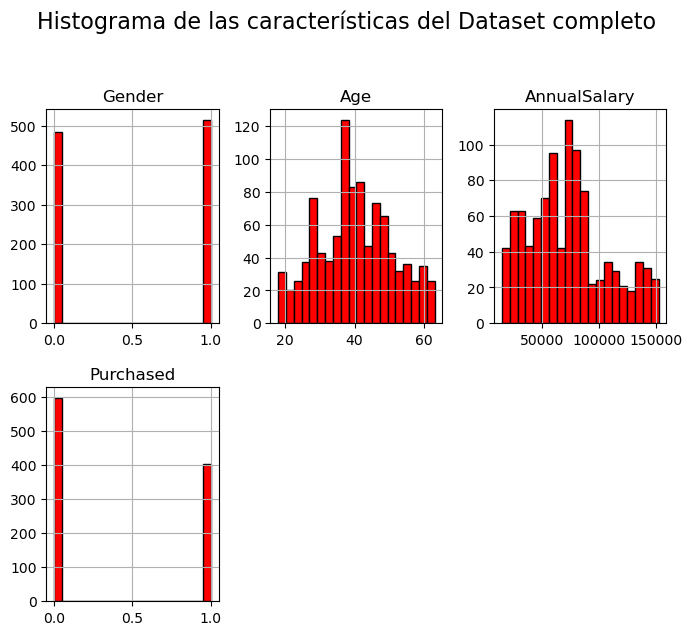

In [150]:

import matplotlib.pyplot as plt
import seaborn as sns

data_set_cars.hist(bins=20, figsize=(8, 10), layout=(3, 3), color='red', edgecolor='black')
plt.suptitle('Histograma de las características del Dataset completo', fontsize=16)
plt.show()


Como se aprecian en los histogramas, la distribución de la edad muestra un pico alrededor de los 35 a 40 años, lo que muestra que la mayoría de usuarios rondan dichas edades.

Respecto al salario anual, la mayoría de usuarios tienen un salario que se sitúa entre los 50 000 a 100 000, con un pico destacable entre los 80 0000 y 90 000.

El género se mantiene relativamente equilibrado.

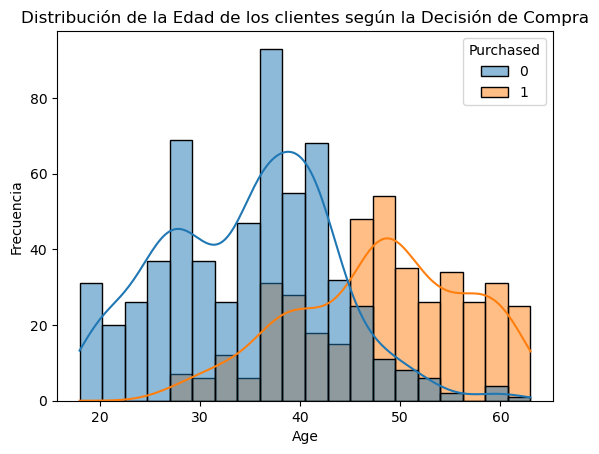

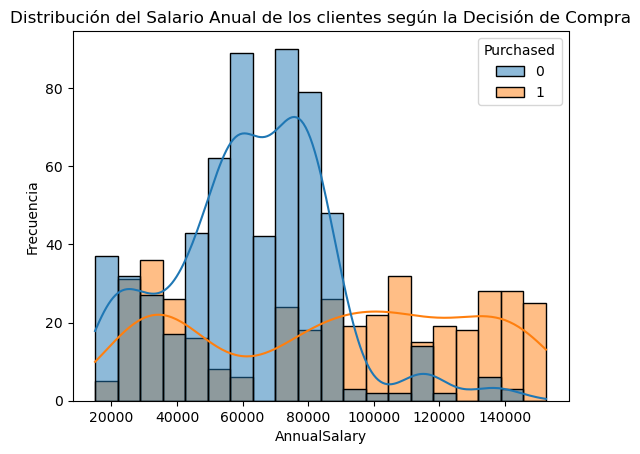

In [151]:
sns.histplot(data_set_cars, x='Age', hue='Purchased', kde=True, bins=20, color='red', edgecolor='black')
plt.title('Distribución de la Edad de los clientes según la Decisión de Compra')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(data_set_cars, x='AnnualSalary', hue='Purchased', kde=True, bins=20, color='red', edgecolor='black')
plt.title('Distribución del Salario Anual de los clientes según la Decisión de Compra')
plt.ylabel('Frecuencia')
plt.show()


Se destaca lo siguiente de los anteriores histogramas:

* La mayoría de los usuarios que no compraron el carro se encuentran en los rangos de edad de 20 a 40 años. Las personas que tienen a comprar carro se concentran entre los 45 y 60 años.
* La mayoría de los usuarios que no compraron el carro tienden a tener un salario anual en un rango entre 50 000 a 80 000 dólares. Sin embargo, la probabilidad de compra aumenta con clientes que superan los 100 000 dólares.

### Gráficos de dispersión

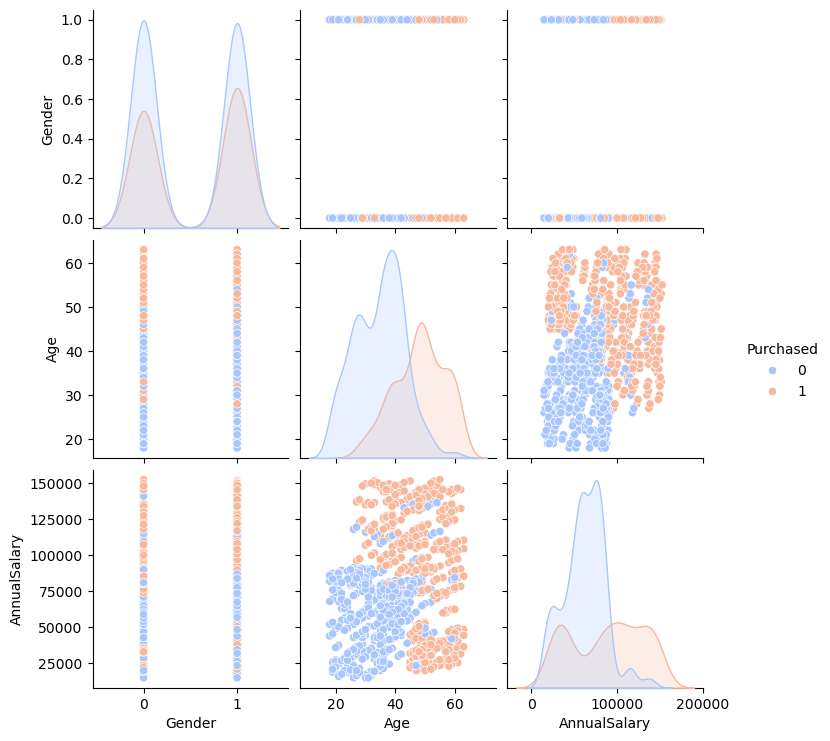

In [152]:
sns.pairplot(data_set_cars, hue='Purchased', palette='coolwarm')
plt.show()

Las más destacadas distribuciones son las siguientes:

* Distribución de Gender:
    Cuando se revisan las diferentes distribuciones que involucran hombres y mujeres respecto a la compra de un carro es bastante similar, por lo tanto se confirma que el género no es un factor fuerte para la decisión de compra.

* Distribución de Age vs Annual Salary:
    Se muestra de forma clara cómo el salario y la edad son factores clave para la decisión de compra, ya que, entre mayor sea el cliente a 40 años y sus ingresos superen los 100 000 dólares la probabilidad de compra será muy alta. 

## Modelos: KNN y Regresión Logística

### División y Estandarización del conjunto de datos 

Se divide el conjunto de datos en 70% para entrenamiento, 15% para validación, y 15% para pruebas. Usando Stratified Sampling como técnica para subdividir el dataset. 

In [153]:
from sklearn.model_selection import train_test_split

X = data_set_cars.drop(columns=['Purchased']) 
y = data_set_cars['Purchased']

# 70% de los datos para entreaniento y el 30% para validación y pruebas
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, stratify=y,random_state=10)

# 15% de los datos para validación y el 15% para pruebas
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=10)

# Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Tamaño del Dataset de Entrenamiento: {len(X_train)}")
print(f"Tamaño del Dataset de Validación: {len(X_val)}")
print(f"Tamaño del Dataset de Pruebas: {len(X_test)}")


Tamaño del Dataset de Entrenamiento: 700
Tamaño del Dataset de Validación: 150
Tamaño del Dataset de Pruebas: 150


### Entrenamiento KNN

Se entrena al modelo KNN probando valores desde 1 a 31 para conseguir el K más optimo.

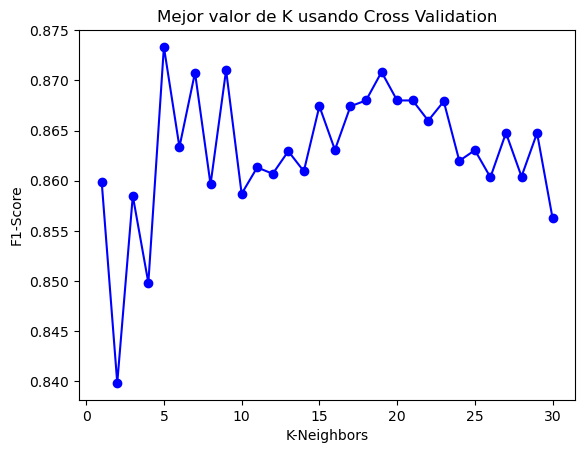

El mejor valor de K es: 5
F1-Score en el conjunto de entrenamiento: 0.9119718309859155
F1-Score en el conjunto de validación: 0.9401709401709402


In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import numpy as np

n_neighbors_values = range(1, 31)
train_scores = []
val_scores_cv = []
val_scores = []

for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    train_score_cv = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1') # Usamos K-Fold Cross Validation con K=10
    train_scores.append(train_score_cv.mean())



best_k = n_neighbors_values[np.argmax(train_scores)]

plt.plot(n_neighbors_values, train_scores, marker='o', linestyle='-', color='b')
plt.title('Mejor valor de K usando Cross Validation')
plt.xlabel('K-Neighbors')
plt.ylabel('F1-Score')
plt.show()

print(f"El mejor valor de K es: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
train_score = f1_score(y_train, y_pred_train)

y_pred_val = knn.predict(X_val)
val_score = f1_score(y_val, y_pred_val)
print(f"F1-Score en el conjunto de entrenamiento: {train_score}")
print(f"F1-Score en el conjunto de validación: {val_score}")

### Testing del KNN

En este caso, como el mejor K utilizando el conjunto de validación fue 5, es el que se utilizará como hiperpárametro.

In [155]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

knn.set_params(n_neighbors=best_k)
# knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy en el conjunto de pruebas: {accuracy_score(y_test, y_pred)}")

print("\n")
print("Reporte de Clasificación")
print(classification_report(y_test, y_pred))

Accuracy en el conjunto de pruebas: 0.9133333333333333


Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        89
           1       0.85      0.95      0.90        61

    accuracy                           0.91       150
   macro avg       0.91      0.92      0.91       150
weighted avg       0.92      0.91      0.91       150



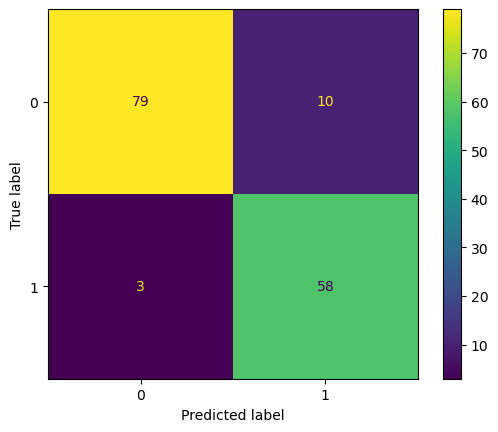

In [156]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

El modelo obtuvo: 
* 79 TN (No compras de vehiculos correctas) 
* 3 FP (Compras de carros que fueron catalogadas como no compras)
* 10 FN (No compras que fueron clasificados como compras) 
* 58 TP (Compras de vehiculos correctas)

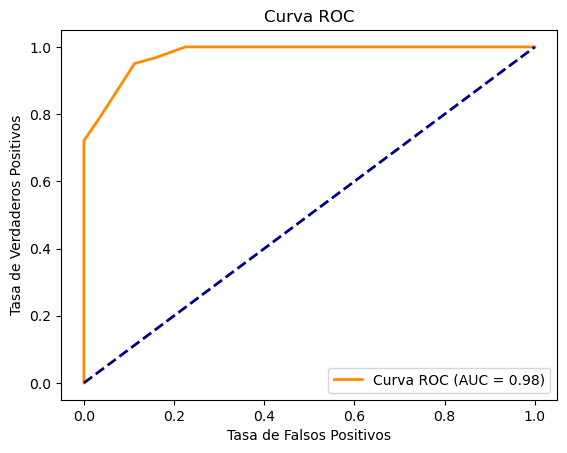

In [157]:
# Curva ROC
from sklearn.metrics import roc_curve, auc

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

### Entrenamiento Regresión Logística

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inversa del parámetro de regularización
    'penalty': ['l2'], # Tipo de regularización
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], # Algoritmo a utilizar
    'max_iter': [100, 200, 300], # Número máximo de iteraciones
    'class_weight': ['balanced', None] # Peso de las clases

}

grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

print(f"Resultados:\n{results[['rank_test_score', 'mean_test_score', 'params']]}")

print(f"Mejores parámetros: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)


print(f"F1-Score en el conjunto de training: {f1_score(y_train, y_train_pred)}")


y_pred_val = best_model.predict(X_val)
print(f"F1-Score en el conjunto de validación: {f1_score(y_val, y_pred_val)}")





NameError: name 'X_train' is not defined

### Testing Regresión Logística

In [163]:
y_pred = best_model.predict(X_test)
print(f"Accuracy en el conjunto de pruebas: {accuracy_score(y_test, y_pred)}")

print("\n")
print("Reporte de Clasificación")
print(classification_report(y_test, y_pred))

Accuracy en el conjunto de pruebas: 0.8666666666666667


Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        89
           1       0.81      0.89      0.84        61

    accuracy                           0.87       150
   macro avg       0.86      0.87      0.86       150
weighted avg       0.87      0.87      0.87       150



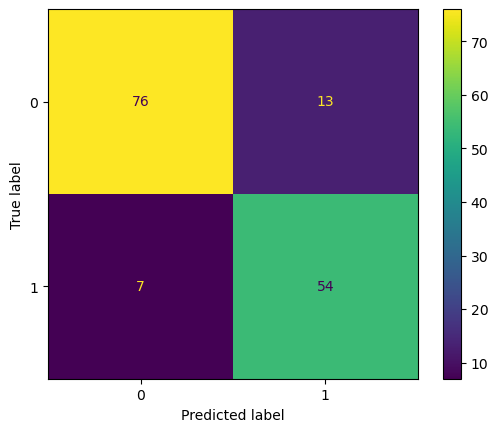

In [164]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

El modelo obtuvo: 
* 76 TN (No compras de vehiculos correctas) 
* 7 FP (Compras de carros que fueron catalogadas como no compras)
* 13 FN (No compras que fueron clasificados como compras) 
* 54 TP (Compras de vehiculos correctas)

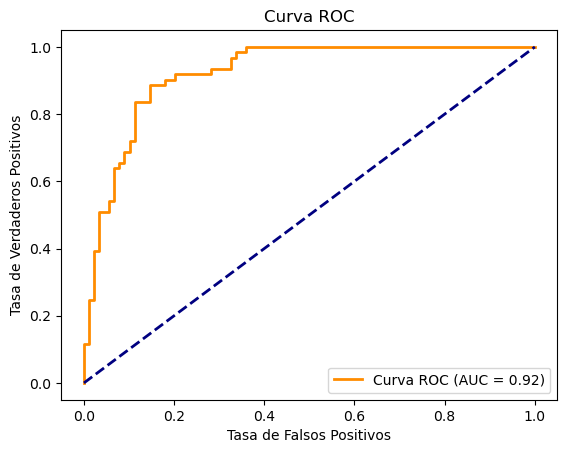

In [165]:
# Curva ROC
y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

## Comparación de resultados de ambos modelos

### Accuracy

KNN: 0.91
Regresión Logística: 0.87

El modelo KNN tiene un accuracy más alto en comparación de la regresión logística. Esto significa que KNN hace un mejor trabajo clasificando la mayoría de samples del dataset.

### Precision

KNN:
* Clase 0 (negativa): 0.96
* Clase 1 (positiva): 0.85
* Promedio: 0.92

Regresión Logística:
* Clase 0 (negativa): 0.92
* Clase 1 (positiva): 0.81
* Promedio: 0.87

En cuanto al precision, KNN es superior en ambas clases.

### Recall

KNN:
* Clase 0 (negativa): 0.89
* Clase 1 (positiva): 0.95
* Promedio: 0.91

Regresión Logística:
* Clase 0 (negativa): 0.85
* Clase 1 (positiva): 0.89
* Promedio: 0.87

En el recall, KNN tiene mejor rendimiento identificando correctamente los ejemplos positivos.

### F1-Score

KNN:
* Clase 0 (negativa): 0.92
* Clase 1 (positiva): 0.90
* Promedio: 0.91

Regresión Logística:
* Clase 0 (negativa): 0.88
* Clase 1 (positiva): 0.84
* Promedio: 0.87

Para ambas clases, el KNN es mejor, indicando que es equiliba mejor el precision y recall.

### General

El modelo K-Nearest Neighbors muestra mejores resultados en todos los aspectos probados.



## Bibliografía

Espinoza, G. (2023, 1 marzo). 4 razones emocionales de tus clientes para comprar un auto. Impulse. https://blog.impulse.lat/4-razones-de-emocionales-de-tus-clientes-para-comprar-un-auto